<a href="https://colab.research.google.com/github/ReemFarah/ReemFarah.github.io/blob/main/CC9_Analytics_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

In [ ]:
prices_df = pd.read_csv('https://eco-prices-scrapes.s3.eu-west-2.amazonaws.com/teaching/redacted_prices_df.csv')
items_df = pd.read_csv('https://eco-prices-scrapes.s3.eu-west-2.amazonaws.com/teaching/redacted_items_df.csv')


In [ ]:
# Merge datasets on product_id (or equivalent matching column)
merged_data = pd.merge(prices_df, items_df, on='product_id', how='inner')

# Preview the merged data
print(merged_data.head())

         date  price      unit_price  loyalty_price  original_price  \
0  2023-10-06  12.95  0.16 per 100ml            NaN             NaN   
1  2023-10-06  12.95  0.16 per 100ml            NaN             NaN   
2  2023-10-06   9.00      9 per 75cl            NaN             NaN   
3  2023-10-06   4.00   1.29 per 100g            NaN             NaN   
4  2023-10-06   4.00   1.29 per 100g            NaN             NaN   

   store_id_x  product_id  store_id_y    cpi_id  \
0           5    209870.0           5  212023.0   
1           5    209870.0           5  212025.0   
2           5    265800.0           5  310426.0   
3           5    181052.0           5  212228.0   
4           5    181052.0           5  212218.0   

                         cpi_name  
0   cola/fizzy drink 330ml pk 4-8  
1  cola drink, reg,bottle,1.25-2l  
2  sparkling wine 75cl min 11%abv  
3         malted chocolate sweets  
4   carton/box of chocs 150-400gm  


count    6.444898e+06
mean     4.935215e+00
std      9.387911e+00
min      1.000000e-02
25%      1.500000e+00
50%      2.500000e+00
75%      4.150000e+00
max      3.000000e+02
Name: price, dtype: float64


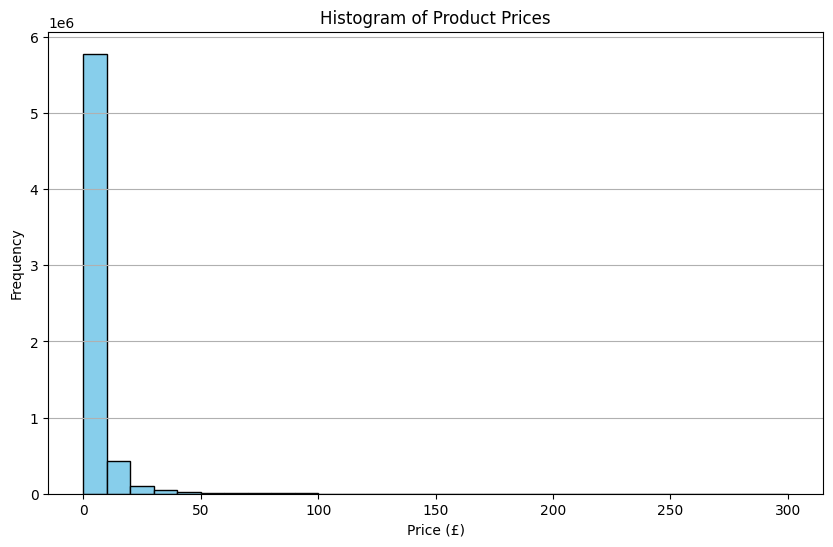

In [ ]:
# Step 1: Check the distribution of prices
print(merged_data['price'].describe())

# Step 2: Plot the histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(merged_data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


In [ ]:
# Summary statistics to detect outliers
print(merged_data['price'].describe())

# Check for extreme values
print(merged_data[merged_data['price'] > merged_data['price'].quantile(0.99)])  # Top 1% of prices


count    6.444898e+06
mean     4.935215e+00
std      9.387911e+00
min      1.000000e-02
25%      1.500000e+00
50%      2.500000e+00
75%      4.150000e+00
max      3.000000e+02
Name: price, dtype: float64
               date  price       unit_price  loyalty_price  original_price  \
85       2023-10-06  48.00  68.57 per litre            NaN             NaN   
105      2023-10-06  49.00      49 per 75cl            NaN             NaN   
2125     2023-10-06  48.00      48 per 75cl            NaN             NaN   
2269     2023-10-06  54.00      54 per 75cl            NaN             NaN   
2294     2023-10-06  67.00      67 per 75cl            NaN             NaN   
...             ...    ...              ...            ...             ...   
6444359  2024-07-26  48.00    £48.00 / 75cl            NaN            48.0   
6444559  2024-08-12  61.00       61.0p/each            NaN             NaN   
6444560  2024-08-12  61.00       61.0p/each            NaN             NaN   
6444874  2024-11

In [ ]:
# Filter out outliers (e.g., keep prices below the 99th percentile)
price_cap = merged_data['price'].quantile(0.99)
filtered_data = merged_data[merged_data['price'] <= price_cap]

# Summary statistics of filtered data
print(filtered_data['price'].describe())


count    6.380467e+06
mean     4.241704e+00
std      5.614099e+00
min      1.000000e-02
25%      1.500000e+00
50%      2.490000e+00
75%      4.000000e+00
max      4.700000e+01
Name: price, dtype: float64


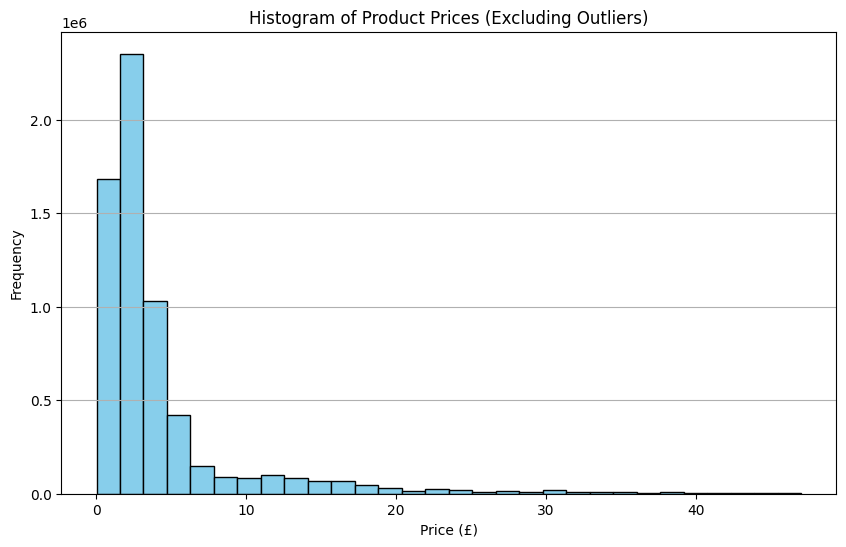

In [ ]:
# Plot the filtered histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Product Prices (Excluding Outliers)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


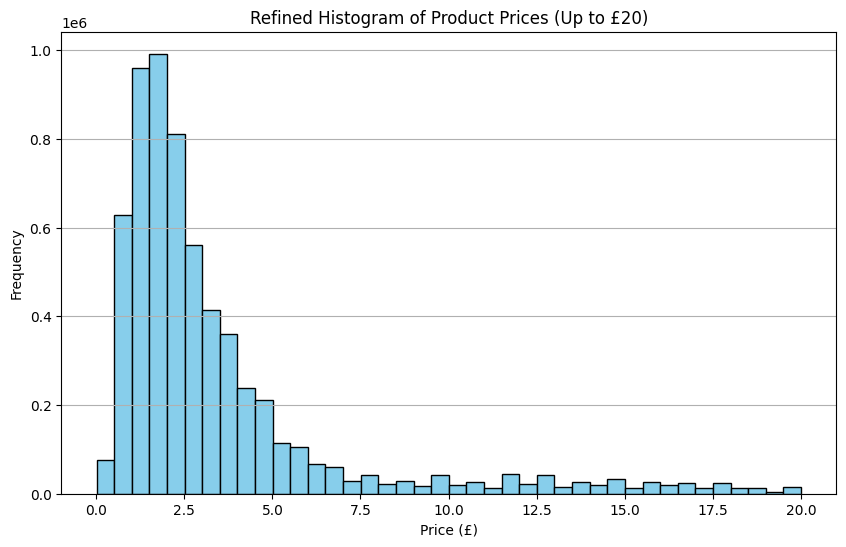

In [ ]:
# Refine the bin size and focus range (e.g., only include prices up to £20)
plt.figure(figsize=(10, 6))
plt.hist(filtered_data[filtered_data['price'] <= 20]['price'], bins=40, color='skyblue', edgecolor='black')
plt.title('Refined Histogram of Product Prices (Up to £20)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


This histogram illustrates the distribution of product prices after excluding outliers (e.g., prices above the 99th percentile). By focusing on prices below £20, the chart provides a clearer understanding of the typical price ranges across the dataset. Peaks in the histogram highlight the most common price points, while the spread indicates variability.

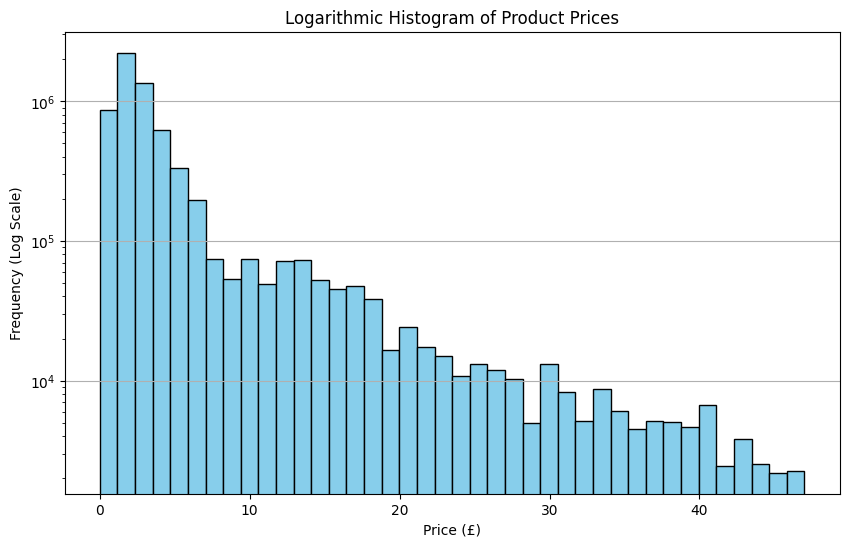

In [ ]:
# Plot histogram with logarithmic scaling
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price'], bins=40, color='skyblue', edgecolor='black', log=True)
plt.title('Logarithmic Histogram of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency (Log Scale)')
plt.grid(axis='y')
plt.show()


In [20]:
import numpy as np
import seaborn as sns



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

In [22]:
prices_df = pd.read_csv('https://eco-prices-scrapes.s3.eu-west-2.amazonaws.com/teaching/redacted_prices_df.csv')
items_df = pd.read_csv('https://eco-prices-scrapes.s3.eu-west-2.amazonaws.com/teaching/redacted_items_df.csv')

In [23]:
# Merge the prices and items datasets again
merged_data = pd.merge(prices_df, items_df, on='product_id', how='inner')

# Check the first few rows to confirm the merge
print(merged_data.head())


         date  price      unit_price  loyalty_price  original_price  \
0  2023-10-06  12.95  0.16 per 100ml            NaN             NaN   
1  2023-10-06  12.95  0.16 per 100ml            NaN             NaN   
2  2023-10-06   9.00      9 per 75cl            NaN             NaN   
3  2023-10-06   4.00   1.29 per 100g            NaN             NaN   
4  2023-10-06   4.00   1.29 per 100g            NaN             NaN   

   store_id_x  product_id  store_id_y    cpi_id  \
0           5    209870.0           5  212023.0   
1           5    209870.0           5  212025.0   
2           5    265800.0           5  310426.0   
3           5    181052.0           5  212228.0   
4           5    181052.0           5  212218.0   

                         cpi_name  
0   cola/fizzy drink 330ml pk 4-8  
1  cola drink, reg,bottle,1.25-2l  
2  sparkling wine 75cl min 11%abv  
3         malted chocolate sweets  
4   carton/box of chocs 150-400gm  


In [24]:
# Extract numeric values from unit_price
merged_data['unit_price_clean'] = merged_data['unit_price'].str.extract(r'(\d+\.?\d*)').astype(float)

# Drop rows with missing or invalid values
valid_data = merged_data.dropna(subset=['price', 'unit_price_clean'])

# Check the cleaned data
print(valid_data.head())


         date  price      unit_price  loyalty_price  original_price  \
0  2023-10-06  12.95  0.16 per 100ml            NaN             NaN   
1  2023-10-06  12.95  0.16 per 100ml            NaN             NaN   
2  2023-10-06   9.00      9 per 75cl            NaN             NaN   
3  2023-10-06   4.00   1.29 per 100g            NaN             NaN   
4  2023-10-06   4.00   1.29 per 100g            NaN             NaN   

   store_id_x  product_id  store_id_y    cpi_id  \
0           5    209870.0           5  212023.0   
1           5    209870.0           5  212025.0   
2           5    265800.0           5  310426.0   
3           5    181052.0           5  212228.0   
4           5    181052.0           5  212218.0   

                         cpi_name  unit_price_clean  
0   cola/fizzy drink 330ml pk 4-8              0.16  
1  cola drink, reg,bottle,1.25-2l              0.16  
2  sparkling wine 75cl min 11%abv              9.00  
3         malted chocolate sweets              1.2

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt



In [27]:
sampled_data = valid_data.sample(n=10000, random_state=42)

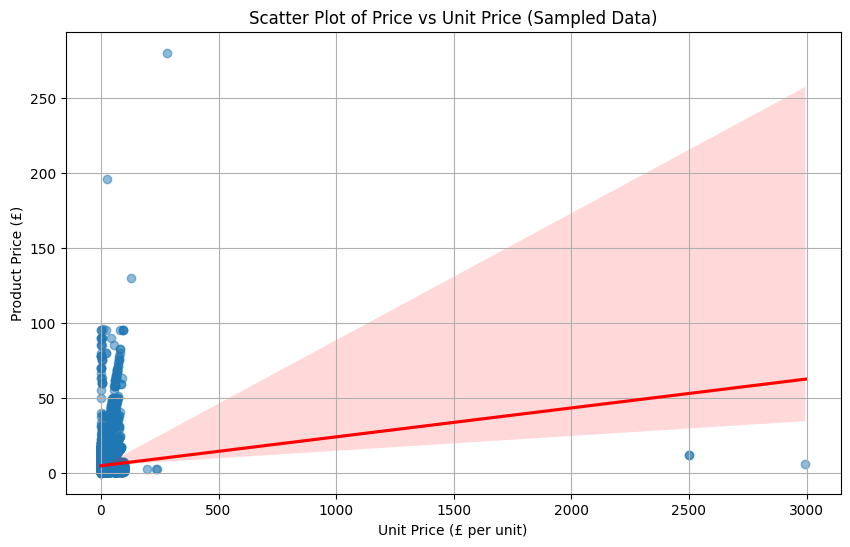

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(x=sampled_data['unit_price_clean'], y=sampled_data['price'], scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Scatter Plot of Price vs Unit Price (Sampled Data)')
plt.xlabel('Unit Price (£ per unit)')
plt.ylabel('Product Price (£)')
plt.grid()
plt.show()

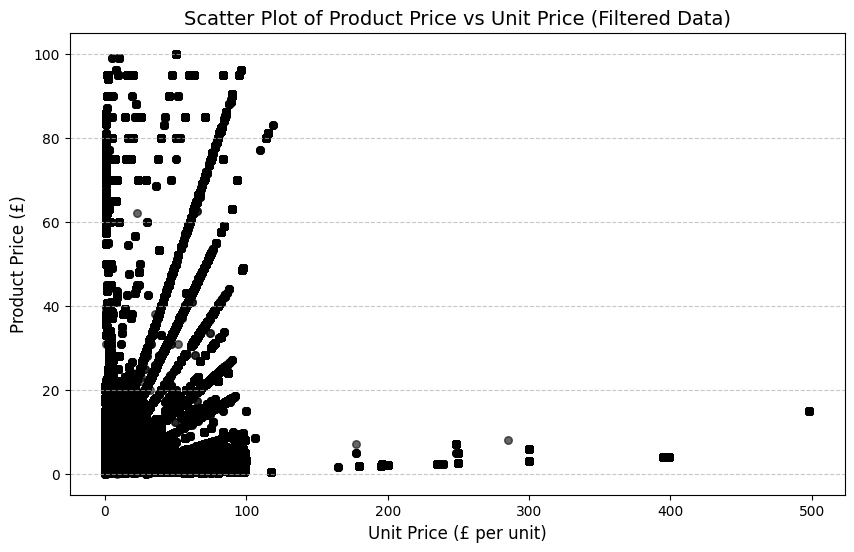

In [30]:
# Filter valid numeric data and focus on smaller range
filtered_data = valid_data[(valid_data['unit_price_clean'] <= 500) & (valid_data['price'] <= 100)]

# Scatter plot with better aesthetics
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['unit_price_clean'], filtered_data['price'], alpha=0.6, color='black', edgecolors='black', s=30)
plt.title('Scatter Plot of Product Price vs Unit Price (Filtered Data)', fontsize=14)
plt.xlabel('Unit Price (£ per unit)', fontsize=12)
plt.ylabel('Product Price (£)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [31]:
filtered_data = valid_data[(valid_data['unit_price_clean'] <= 200) & (valid_data['price'] <= 50)]


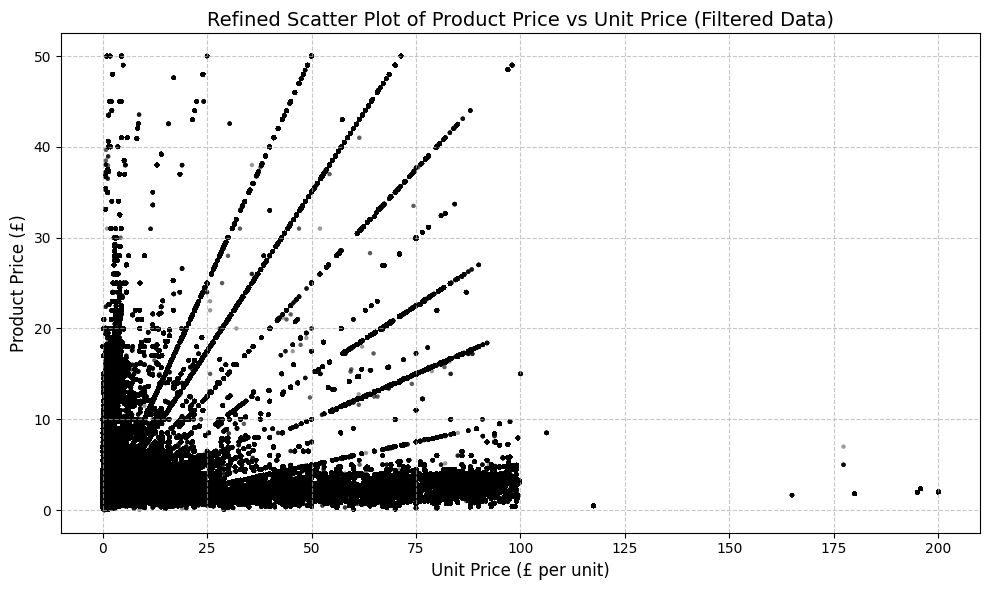

In [32]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    filtered_data['unit_price_clean'],
    filtered_data['price'],
    alpha=0.4,
    color='black',
    edgecolors='none',
    s=10  # Smaller marker size
)
plt.title('Refined Scatter Plot of Product Price vs Unit Price (Filtered Data)', fontsize=14)
plt.xlabel('Unit Price (£ per unit)', fontsize=12)
plt.ylabel('Product Price (£)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This scatter plot examines the relationship between product price and unit price, focusing on a filtered subset of data (unit price ≤ £200, product price ≤ £50). The refined plot eliminates extreme values, making the pattern of distribution more apparent. Transparency and reduced marker size enhance readability, highlighting the clustering of products at lower unit prices and their corresponding product prices.